Saving Mall_Customers.csv to Mall_Customers.csv
Uploaded file: Mall_Customers.csv
Dataset loaded successfully!
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Columns in the dataset: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Missing values in selected features: Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


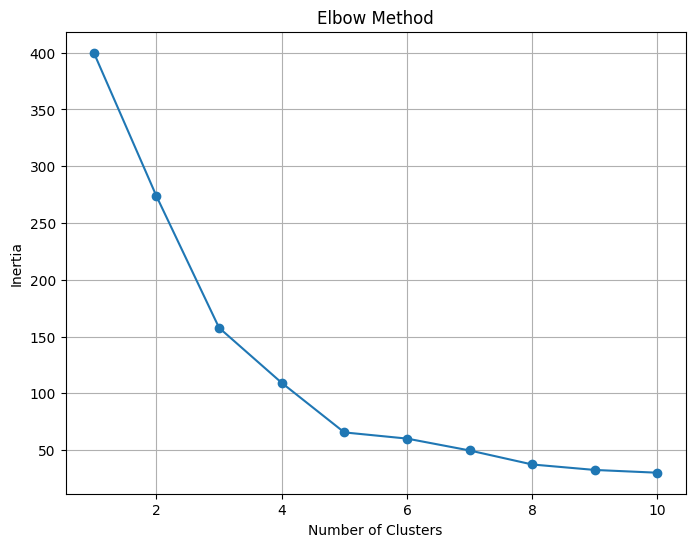

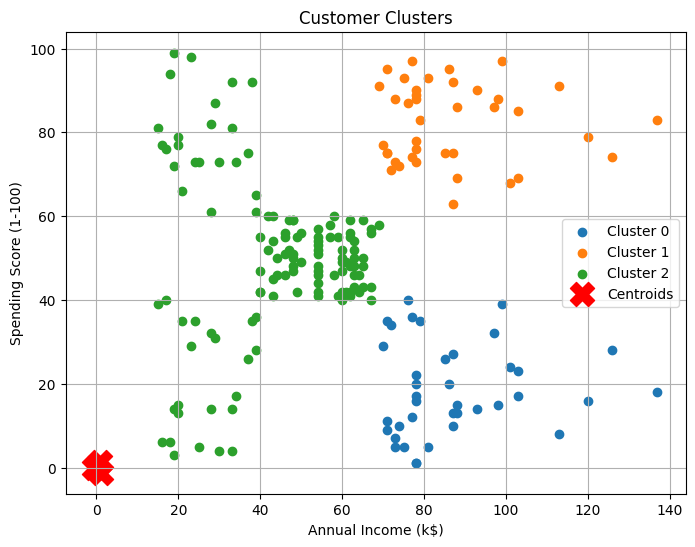

Clustered dataset saved as 'clustered_customers.csv'.


In [1]:
from google.colab import files

# Upload a file
uploaded = files.upload()

# Check the uploaded file
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Use the uploaded filename instead of a hardcoded file path
file_path = list(uploaded.keys())[0]  # Get the first uploaded file's name

# Load the dataset
data = pd.read_csv(file_path)
print("Dataset loaded successfully!")
print(data.head())

# Check the column names to ensure they're correct
print("Columns in the dataset:", data.columns)

# Select relevant features for clustering (update column names as necessary)
# Replace these names with actual column names if they differ
features = ['Annual Income (k$)', 'Spending Score (1-100)']

# Check for any missing values in the selected features
print("Missing values in selected features:", data[features].isnull().sum())

# If there are missing values, you can handle them, e.g., by dropping or filling
# data = data.dropna(subset=features)  # To drop rows with missing values in the selected features

# Extract features and standardize them
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Choose the optimal number of clusters (e.g., 3) based on the Elbow plot
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data[features[0]], cluster_data[features[1]], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Clusters')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.grid()
plt.show()

# Save the clustered dataset
data.to_csv('clustered_customers.csv', index=False)
print("Clustered dataset saved as 'clustered_customers.csv'.")
